# Data Scientist Nanodegree Program Project: Write a Data Scientist Blog Post

Follow CRISP-DM (cross industry standard process for data mining)
6 key steps

# 1 - Business Understanding

- Pick a dataset interested in and can utilise tools and processes learned from introduction to data science part of nanodegree.
Interested in electricy demand and supply.
Domestic smart meters should provide greater opportunity to understand demand side.

- Pose at least three questions related to business or real-world applications of how the data could be used;
1. From selected data, how well can we predict electricity usage?
2. What parameters correlate with electricity usage?
3. What household characteristics demonstrate high and low usage?

# 2 - Data Understanding

Smart meter data and supporting information from Kaggle dataset;
https://www.kaggle.com/jeanmidev/smart-meters-in-london

high dataset usability category

# 3 - Data Preparation

Access and explore.

Project asks for dealing with missing data and categories.

For size and processing time purpose, read in first data block sets to understand further.

Took some ideas from following notebooks;

https://www.kaggle.com/tomneeld/dashboards-and-clustering

https://www.kaggle.com/rheajgurung/energy-consumption-forecast

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# broadly review what is in daily data set
daily_data_set_block0 = pd.read_csv('/Users/dduggan/Desktop/data science project 1/daily_dataset/daily_dataset/block_0.csv')
daily_data_set_block0.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [5]:
daily_data_set_block0.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,25574.000000,25574.000000,25574.000000,25574.000000,25496.000000,25574.000000,25574.000000
mean,0.366426,0.450346,1.348149,47.807148,0.282705,21.543821,0.167271
std,0.407172,0.421025,0.910607,2.771494,0.201086,20.205007,0.255782
min,0.007000,0.012000,0.012000,1.000000,0.002499,0.012000,0.000000
25%,0.145500,0.213896,0.732000,48.000000,0.138956,10.231000,0.050000
50%,0.231500,0.318958,1.173000,48.000000,0.243201,15.260000,0.091000
75%,0.406500,0.528979,1.762000,48.000000,0.384356,25.332750,0.159000
max,5.522000,5.791125,8.170999,48.000000,2.557372,277.973999,5.052000


In [6]:
# broadly review what is in half hourly data set
halfhourly_dataset_block0 = pd.read_csv('/Users/dduggan/Desktop/data science project 1/halfhourly_dataset/halfhourly_dataset/block_0.csv')
halfhourly_dataset_block0.tail()

,LCLid,tstp,energy(kWh/hh)
1222665,MAC005492,2014-02-27 22:00:00.0000000,0.182
1222666,MAC005492,2014-02-27 22:30:00.0000000,0.122
1222667,MAC005492,2014-02-27 23:00:00.0000000,0.14
1222668,MAC005492,2014-02-27 23:30:00.0000000,0.192
1222669,MAC005492,2014-02-28 00:00:00.0000000,0.088


In [7]:
halfhourly_dataset_block0.describe()

,LCLid,tstp,energy(kWh/hh)
count,1222670,1222670,1222670
unique,50,39292,5022
top,MAC000246,2012-12-16 15:00:00.0000000,0.013
freq,39245,50,6238


Circa. 1.2million rows / meter readings.

50 unique meter locations (LCLid).

In [8]:
# broadly review what is in "hh" data set
hh_dataset_block0 = pd.read_csv('/Users/dduggan/Desktop/data science project 1/hhblock_dataset/hhblock_dataset/block_0.csv')
hh_dataset_block0.tail()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
25281,MAC005492,2014-02-23,0.165,0.206,0.149,0.101,0.115,0.120,0.102,0.105,...,0.296,0.750,0.315,0.326,0.293,0.287,0.213,0.287,0.245,0.222
25282,MAC005492,2014-02-24,0.219,0.236,0.288,0.219,0.165,0.086,0.111,0.095,...,0.303,0.378,0.253,0.193,0.212,0.193,0.192,0.297,0.168,0.170
25283,MAC005492,2014-02-25,0.194,0.185,0.150,0.095,0.081,0.082,0.081,0.112,...,0.545,0.233,0.245,0.194,0.215,0.201,0.241,0.162,0.157,0.167
25284,MAC005492,2014-02-26,0.205,0.183,0.186,0.165,0.194,0.114,0.080,0.090,...,0.298,0.224,0.239,0.242,0.237,0.246,0.333,0.202,0.232,0.203
25285,MAC005492,2014-02-27,0.167,0.112,0.120,0.083,0.083,0.112,0.081,0.082,...,0.325,0.258,0.259,0.243,0.222,0.250,0.182,0.122,0.140,0.192


In [9]:
# broadly review what is in Acorn data set
# what is Acorn? Consumer classification tool that segments the UK pop. by postcode
# https://www.caci.co.uk/sites/default/files/resources/Acorn%20User%20Guide%202020.pdf

# needed to use following guidance to resolve UnicodeDecodeError:
# https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

acorn_data = pd.read_csv('/Users/dduggan/Desktop/data science project 1/acorn_details.csv', encoding= 'unicode_escape')
acorn_data.head(500)

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,DIGITAL,Regularly research on the internet,Furniture,98.0,98.0,94.0,121.0,118.0,101.0,107.0,102.0,102.0,112.0,90.0,90.0,90.0,87.0,100.0,100.0,106.0
496,DIGITAL,Regularly research on the internet,Beer/Wine/Spirits,113.0,122.0,115.0,128.0,133.0,87.0,98.0,98.0,98.0,105.0,174.0,89.0,91.0,67.0,83.0,83.0,77.0
497,DIGITAL,Regularly research on the internet,Travel tickets (non airline),159.0,124.0,108.0,188.0,158.0,100.0,118.0,89.0,87.0,106.0,137.0,78.0,73.0,56.0,82.0,82.0,72.0
498,DIGITAL,Regularly research on the internet,Toys,71.0,107.0,101.0,82.0,112.0,98.0,103.0,115.0,72.0,113.0,80.0,103.0,133.0,67.0,90.0,88.0,82.0


In [10]:
# broadly review what is in household information data set
houseinfo = pd.read_csv('/Users/dduggan/Desktop/data science project 1/informations_households.csv')
houseinfo.head(5000)

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
4995,MAC004764,Std,ACORN-Q,Adversity,block_99
4996,MAC000249,Std,ACORN-Q,Adversity,block_99
4997,MAC004652,Std,ACORN-Q,Adversity,block_99
4998,MAC003038,Std,ACORN-Q,Adversity,block_99


From understanding the data, taking following approach;

merge daily household energy consumption with household information.

try use acron variables to predict energy consumption

In [11]:
# merge data
merged_block0 = pd.merge(daily_data_set_block0, houseinfo)
merged_block0.head(50000)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Std,ACORN-A,Affluent,block_0
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Std,ACORN-A,Affluent,block_0
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Std,ACORN-A,Affluent,block_0
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Std,ACORN-A,Affluent,block_0
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25569,MAC005492,2014-02-24,0.1690,0.175042,0.378,48,0.073174,8.402,0.079,ToU,ACORN-,ACORN-,block_0
25570,MAC005492,2014-02-25,0.1550,0.160792,0.545,48,0.082118,7.718,0.079,ToU,ACORN-,ACORN-,block_0
25571,MAC005492,2014-02-26,0.1490,0.178542,0.687,48,0.120820,8.570,0.079,ToU,ACORN-,ACORN-,block_0
25572,MAC005492,2014-02-27,0.1140,0.146167,0.478,48,0.082616,7.016,0.079,ToU,ACORN-,ACORN-,block_0


In [12]:
# data prep for supervised ML model

# map household category data (Acorn_grouped) to quant variable
# https://chrisalbon.com/code/machine_learning/preprocessing_structured_data/encoding_ordinal_categorical_features/
# create mapping
acorn_mapped = {'ACORN-A':1,
                'ACORN-B':2,
                'ACORN-C':3,
                'ACORN-D':4,
                'ACORN-E':5,
                'ACORN-F':6,
                'ACORN-G':7,
                'ACORN-H':8,
                'ACORN-I':9,
                'ACORN-J':10,
                'ACORN-K':11,
                'ACORN-L':12,
                'ACORN-M':13,
                'ACORN-N':14,
                'ACORN-O':15,
                'ACORN-P':16,
                'ACORN-Q':17,
                'ACORN-U':18,
                'ACORN-':19}
# map 'Acorn' features to quant
merged_block0_acorn_mapped = merged_block0.replace(acorn_mapped)
df = merged_block0_acorn_mapped
df.head(50000)

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Std,1,Affluent,block_0
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Std,1,Affluent,block_0
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Std,1,Affluent,block_0
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Std,1,Affluent,block_0
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Std,1,Affluent,block_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25569,MAC005492,2014-02-24,0.1690,0.175042,0.378,48,0.073174,8.402,0.079,ToU,19,19,block_0
25570,MAC005492,2014-02-25,0.1550,0.160792,0.545,48,0.082118,7.718,0.079,ToU,19,19,block_0
25571,MAC005492,2014-02-26,0.1490,0.178542,0.687,48,0.120820,8.570,0.079,ToU,19,19,block_0
25572,MAC005492,2014-02-27,0.1140,0.146167,0.478,48,0.082616,7.016,0.079,ToU,19,19,block_0


In [13]:
# data clean
# which columns have no missing values?
# provide a set of columns with 0 missing values
no_nulls = set(df.columns[merged_block0.isnull().mean()==0])
print(no_nulls)

{'energy_min', 'energy_max', 'file', 'energy_median', 'energy_mean', 'stdorToU', 'energy_count', 'LCLid', 'energy_sum', 'Acorn', 'Acorn_grouped', 'day'}


Need to consider if to model 'ACORN-':19. This isn't an Acorn house classification. Leaving in for now and may test against prediction model that exludes these.

Dealing with NaN values in dataset by only using data with no nulls. Sufficient data with no nulls to model for now. May assess dealing with NaNs if see need to use this data in future modelling.

# 4 - Modelling

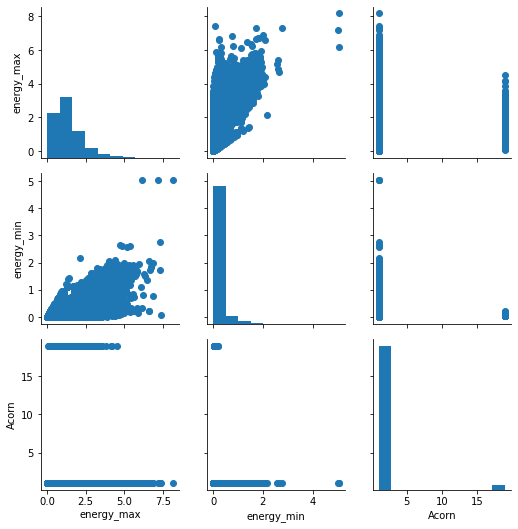

In [24]:
# What parameters correlate well to electircity usage?
# Exploratory analysis
g = sns.PairGrid(data = df, vars = ['energy_max', 'energy_min', 'Acorn'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

total daily energy consumption has a positive correlation with max half hour energy consumption.

In [99]:
# Supervised machine learning process: fit model to training data
# predict daily energy usage;

# split dataset into explanatory and response variables
# useful to have column headers printed above for copy & paste here. Delete out what is not needed.
X = df[['energy_max', 'energy_min', 'Acorn']]
y = df['energy_sum']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state=42)

# instantiate
lm_model = LinearRegression(normalize=True)

# fit
lm_model.fit(X_train, y_train)

# predict
y_test_preds = lm_model.predict(X_test)

# score the model
# Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for the model is {} on {} values.".format(rsquared_score, length_y_test)


'The r-squared score for the model is 0.911015899470917 on 7673 values.'

In [104]:


def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)



,est_int,coefs,abs_coefs
1,energy_min,44.291828,44.291828
0,energy_max,11.342534,11.342534
2,Acorn,-0.108793,0.108793


# 5 - Evaluation

1. From selected data, how well can we predict electricity usage?

Text(0, 0.5, 'total daily energy consumption (kWh)')

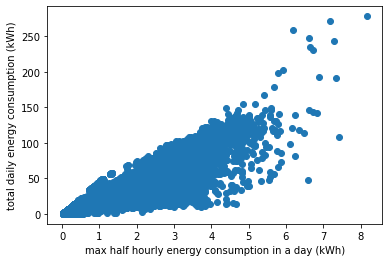

In [27]:
# Explanatory analysis: scatter plot
plt.scatter(data = df, x = 'energy_max', y = 'energy_sum')
plt.xlabel('max half hourly energy consumption in a day (kWh)')
plt.ylabel('total daily energy consumption (kWh)')

The total energy usage for the day correlates well with maximum half hour energy usage in that day, but that is not telling us much for predicting electricity usage. More variables are needed to model.

2. What parameters correlate with electricity usage?

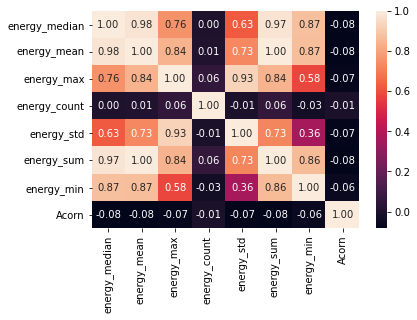

In [28]:
# Explanatory analysis: correlation matrix to check which variables are related to one another
sns.heatmap(df.corr(), annot=True, fmt=".2f");

The household categorisation data (Acorn) does not correlate well. See coefs_df dataframe analysis at end of section 4 above - modelling. This Acorn coefficient has a low coefficient (0.11) with the linear model to predict total daily energy usage (daily_sum) for a household.

3. What household characteristics demonstrate high and low usage?

As reasoned in Q1 & 2 above, cannot tell from this model. More analysis and modelling needed.

where would take analysis next;

time series analysis and include time series data (e.g. weather data), to try predict usage

# 6 - Deployment

Github:https://github.com/Phaedrus44/smart-meters-investigation

Medium post: https://medium.com/@Phaedrus44/can-domestic-electricity-smart-meters-provide-greater-opportunity-to-understand-electricity-demand-625b7be23b53

Kaggle submission:https://www.kaggle.com/diarmuid/notebooka2a7eba424